In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import scipy

In [ ]:
from lagged_coherence import *

In [ ]:
f=h5py.File('../Contralateral/LeftM1_RightHand/epochs_go_cue_session1003.mat', 'r')
data=np.array(f['go_cue_epoch']).T


In [ ]:
freqs=np.linspace(14,100,100)
lags=np.linspace(0.2,2.5,24)
chan_id = list(range(32))

In [ ]:
#lagged coherence calculation

#for chan in chan_id:
chan = 31
data_chan = data[:,chan,:]
lc_classic=lagged_coherence(data_chan, freqs, lags, 1000)
lc_hilbert=lagged_hilbert_coherence(data_chan, freqs, lags, 1000)



In [ ]:
#FWHM
lc_hilbert_initial = lc_classic[:,:,0]
lc_hilbert_mean = np.mean(lc_hilbert_initial,axis=0)


half_peak = max(lc_hilbert_mean)/2
peak_id = np.argmax(lc_hilbert_mean)

deviations = abs(lc_hilbert_mean-half_peak)

d=deviations.copy()
d_half1=deviations[0:peak_id]
d_half2=deviations[peak_id:-1]

b1 = np.argmin(d_half1)
b2 = np.argmin(d_half2)+peak_id


lc_hilbert_beta=lc_hilbert[:,b1:b2,:]
lc_beta_mean = np.mean(lc_hilbert_beta,axis=1)

    

In [ ]:
lc_classic_initial = lc_classic[:,:,0]
lc_classic_mean = np.mean(lc_classic_initial,axis=0)

half_peak = (max(lc_classic_mean))/2
peak_id = np.argmax(lc_classic_mean)

deviations = abs(lc_classic_mean-half_peak)

d=deviations.copy()
d_half1=deviations[0:peak_id]
d_half2=deviations[peak_id:-1]

b1 = np.argmin(d_half1)
b2 = np.argmin(d_half2)+peak_id

lc_classic_beta=lc_classic[:,b1:b2,:]
lc_beta_mean_classic = np.mean(lc_classic_beta,axis=1)


[20.08080808 20.08080808 20.08080808 20.08080808 20.08080808 20.08080808
 20.08080808 20.08080808 20.08080808 20.08080808 20.08080808 20.08080808
 20.08080808 20.08080808 20.08080808 20.08080808 20.08080808 20.08080808
 20.08080808 20.08080808 20.08080808]


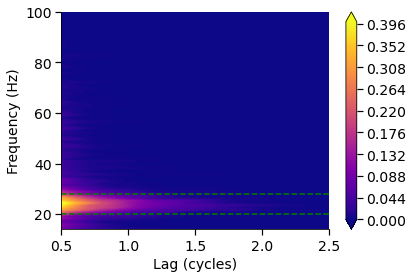

In [404]:
import numpy as np
import matplotlib.pyplot as plt

mean = lc_hilbert_mean
mean_trials = np.nanmean(lc_hilbert,axis=0)
fig = plt.figure()
plt.plot
plt.contourf(lags, freqs, mean_trials, 100, cmap='plasma', levels=np.linspace(0, 0.4, 101), extend='both')
beta_v1 = freqs[b1]
beta_v2 = freqs[b2]
dash1 = np.full(len(lags), beta_v1)
dash2 = np.full(len(lags), beta_v2)
print(dash1)
plt.plot(lags, dash1, '--',color = 'green')
plt.plot(lags, dash2, '--' ,color = 'green')
plt.colorbar()
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')
plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})
plt.show()
fig.savefig('figure5a.svg',format='svg',dpi=150)

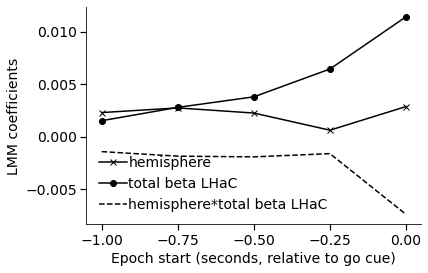

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

x = [-1,-0.75,-0.5,-0.25,0]
y1 = [0.0022875,0.0027303,0.0022411,0.0006111,0.002861]
y2 = [0.0015133,0.002781,0.003785,0.0064318,0.011407]
y3 = [-0.0014294,-0.0018605,-0.0019278,-0.0016199,-0.007405]

# Plot points for Groups
fig,ax = plt.subplots()
ax.plot(x, y1, '-x',label='hemisphere',color='black')
ax.plot(x, y2,'-o', label='total beta LHaC',color='black')
ax.plot(x, y3,'--', label='hemisphere*total beta LHaC',color='black')

# Add labels and legend
ax.xaxis.set_major_locator(MultipleLocator(0.25)) 
plt.xlabel('Epoch start (seconds, relative to go cue)')
plt.ylabel('LMM coefficients')
plt.legend(loc="lower left")
plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})
# Show the plot
plt.show()
fig.savefig('Fig5b.svg',format='svg',dpi=150)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#np.random.seed(8)

def fit_plot_line(x=[], y=[], ci=95):

    alpha = 1 - ci / 100
    n = len(x)

    Sxx = np.sum(x**2) - np.sum(x)**2 / n
    Sxy = np.sum(x * y) - np.sum(x)*np.sum(y) / n
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Linefit
    b = Sxy / Sxx
    a = mean_y - b * mean_x

    # Residuals
    def fit(xx):
        return a + b * xx

    residuals = y - fit(x)

    var_res = np.sum(residuals**2) / (n - 2)
    sd_res = np.sqrt(var_res)

    # Confidence intervals
    se_b = sd_res / np.sqrt(Sxx)
    se_a = sd_res * np.sqrt(np.sum(x**2)/(n * Sxx))

    df = n-2                            # degrees of freedom
    tval = stats.t.isf(alpha/2., df) 	# appropriate t value

    ci_a = a + tval * se_a * np.array([-1, 1])
    ci_b = b + tval * se_b * np.array([-1, 1])

    # create series of new test x-values to predict for
    npts = 100
    px = np.linspace(np.min(x), np.max(x), num=npts)

    def se_fit(x):
        return sd_res * np.sqrt(1. / n + (x - mean_x)**2 / Sxx)


    # Plot the data
    fig=plt.figure()

    plt.plot(px, fit(px), 'k',lw=2)
    plt.plot(x, y, 'k.', markersize=10)

    #x.sort()    
    sorted_indices = np.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]
    
    limit = (1 - alpha) * 100

    plt.fill_between(x, fit(x) - tval * se_fit(x), fit(x) + tval * se_fit(x), facecolor='grey', alpha=0.2)
    
    plt.plot(x, fit(x) + tval * se_fit(x), 'k--', lw=1)
             #label='Confidence limit ({0:.1f}%)'.format(limit))
    plt.plot(x, fit(x) - tval * se_fit(x), 'k--', lw=1)

    #plt.xlabel('X values')
    #plt.ylabel('Y values')
    #plt.title('Linear regression and confidence limits')
    #plt.legend(loc='best')
    #plt.show()
    
    plt.xlim(0, 2.5)
    plt.ylim(-0.6, -0.35)

    plt.xlabel('total beta LHaC')
    plt.ylabel('log(RT)')
    plt.title('Ipsilateral')
    plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
    })
    plt.show
    #fig.savefig('figure5d.svg',format='svg',dpi=150)

0.11791090311628304
0.0011275700590882786


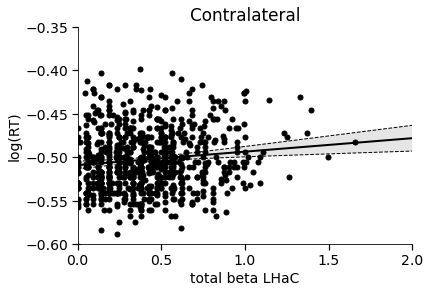

In [21]:
f=h5py.File('Contra_ob_1003.mat', 'r')
data=np.array(f['Contra']).T
from scipy.stats import spearmanr

x=data[:,1]
y=data[:,0]

correlation, p_value = spearmanr(x, y)
print(correlation)
print(p_value)

fit_plot_line(x, y, ci=95)

0.13187281824436123
0.0002669444726969919


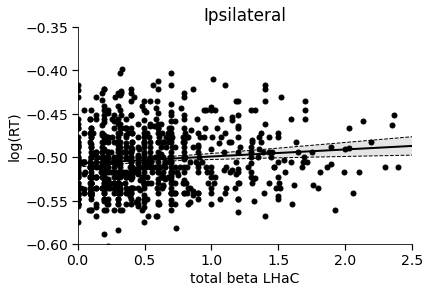

In [23]:
f=h5py.File('Ipsi_ob_1003.mat', 'r')
data=np.array(f['Ipsi']).T
from scipy.stats import spearmanr

x=data[:,1]
y=data[:,0]

correlation, p_value = spearmanr(x, y)
print(correlation)
print(p_value)

fit_plot_line(x, y, ci=95)